In [2]:
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

url = 'http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt'

# Get all Text
text = [l[:-1].decode("utf-8") for l in urllib.request.urlopen(url).readlines()]

# Pull out the info and display
info = {i: l[1:] for i,l in enumerate(text) if l[0] == '%'}
for i in info.values():
    print(i)
    
# Get the last info (separator between air/water temperatures)
separator = max(info.keys())

 This file contains a detailed summary of the changes in Earth's global average
 surface temperature estimated by combining the Berkeley Earth land-surface
 temperature field with a reinterpolated version of the HadSST ocean temperature 
 field.  
 The current citation for this dataset is: 
 
    Rohde, R. A. and Hausfather, Z.: The Berkeley Earth Land/Ocean Temperature
    Record, Earth Syst. Sci. Data, 12, 3469�3479, 
    https://doi.org/10.5194/essd-12-3469-2020, 2020.
 
 The dataset differs slightly from the dataset as described in the citation as 
 HadSST3 has been replaced with the newer HadSST4, and associated interpolation 
 parameters have been refit accordingly.  No other changes in methods were needed 
 when moving to the new version of HadSST. 
 
 Two versions of this average are reported.  These differ in how they treat 
 locations with sea ice.  In the first version, temperature anomalies in the 
 presence of sea ice are extrapolated from land-surface air temperature anom

In [3]:
air_data = [l.split() for i,l in enumerate(text) if l[0] != '%' and len(l)>1 and i<separator]
water_data = [l.split() for i,l in enumerate(text) if l[0] != '%' and len(l)>1 and i>=separator]

columns = ['year', 'month', 'month_avg', 'ma_err', 'year_avg', 'ya_err', '5_year', '5_err',
           '10_year', '10_err', '20_year', '20_err']
air_df = pd.DataFrame(air_data, columns=columns)
water_df = pd.DataFrame(water_data, columns=columns)

In [4]:
dec_cols = ['month_avg', 'ma_err', 'year_avg', 'ya_err', '5_year', '5_err', '10_year', '10_err',
            '20_year', '20_err']
for df in (air_df, water_df):
    df[['year','month']] = df[['year','month']].astype('int')
    df[dec_cols] = df[dec_cols].astype(float)
    df['yr_mnth'] = df['year'] + df['month']/12
    df.set_index('yr_mnth', inplace=True)

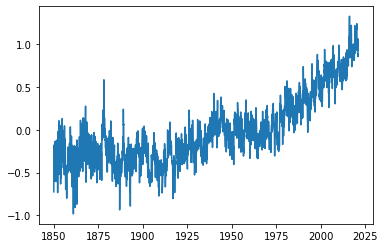

In [5]:
x=air_df.index
y=air_df['month_avg']
plt.plot(x,y)

In [13]:
air_df[air_df.year>1989][['year','month','month_avg']]

,year,month,month_avg
yr_mnth,,,
1990.083333,1990,1,0.423
1990.166667,1990,2,0.392
1990.250000,1990,3,0.739
1990.333333,1990,4,0.648
1990.416667,1990,5,0.541
...,...,...,...
2020.750000,2020,9,1.017
2020.833333,2020,10,0.926
2020.916667,2020,11,1.064


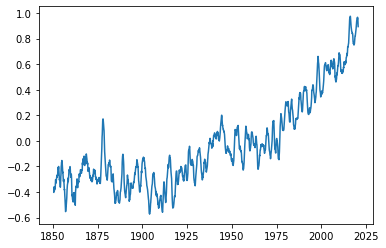

In [6]:
x=water_df.index
y=water_df['year_avg']
plt.plot(x,y)

C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramD

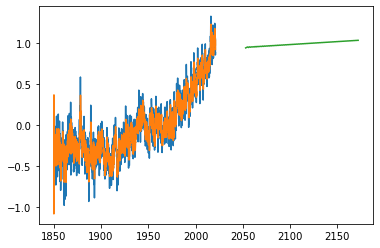

In [12]:
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima.model import ARIMAResults

model = ARIMA(air_df['month_avg'],order=(3,2,6)).fit()

x1=air_df.index
y1=air_df['month_avg']
plt.plot(x1,y1)

x2=air_df.index
y2=model.predict()
plt.plot(x2,y2)

forecast = model.forecast(120)
x3=forecast.index
y3=forecast
plt.plot(x3,y3)

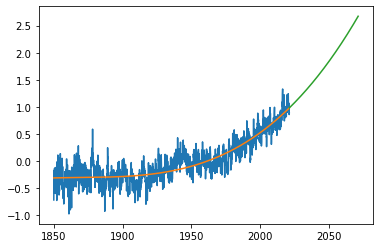

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = air_df.index.values.reshape(-1, 1)
y = air_df['month_avg'].values.reshape(-1, 1)

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly,y)

# Plot Raw Data
x1=air_df.index
y1=air_df['month_avg']
plt.plot(x1,y1)


# Plot Fitted Regression
x2=air_df.index
y2=model.predict(X_poly)
plt.plot(x2,y2)

n = 600  # number of months
max_yr = max(X).round(0)
max_mn = (max(X) - max_yr) * 12
start = (max_yr + int((max_mn+1)/13)) + ((max_mn+1)%13 / 12)

X_forecast = np.arange(start,start+(n/12), 1/12)
X_fore_poly = poly.transform(X_forecast.reshape(-1,1))

# Plot Prediction
x3=X_forecast
y3=model.predict(X_fore_poly)
plt.plot(x3,y3)